<a href="https://colab.research.google.com/github/gitgubbenito/capstone/blob/main/VAERS-v2.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Capstone Project - Vaccine Adverse Event Reporting System

Data files can be found at the following location:
https://vaers.hhs.gov/data/datasets.html

Datasets were to big to be uploaded to github

I focus on 2021 datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import seaborn as sns
sns.set(color_codes = True)
sns.set(style="whitegrid")
import plotly.figure_factory as ff
from plotly.colors import n_colors

In [ ]:
#pip install chardet

In [2]:
import chardet
with open('/content/drive/MyDrive/capstone/2021VAERSSYMPTOMS.csv', 'rb') as f:
    data = f.read()
    encoding_result = chardet.detect(data)
    encoding = encoding_result['encoding']
    print("Detected Encoding:", encoding)

Detected Encoding: ascii


#Things to do
- Load all 2021 files - done
- Explore Datasets - done
- Merge Datasets - done
- Data Clean-up - done
- Determine the most common sysmtoms by vaccine manu - Done
- How many people were disable o die due to the vaccine - Done
- Number of VAERS by state - Done
- Plot top 20 symtoms - Done
# Questions to be answer
1.  Do people who experience side effects from the vaccine tend to experience them sooner or later after vaccination?
2.  Can factors like age, gender, vaccine brand, and medical conditions help predict how strongly someone might react to the vaccine?
3.  Is there a noticeable difference in age between those who have no serious side effects and those who do?
4. What are the most common VAERS presented on pacients with COVID-19 vaccine






In [2]:
#Load all 2021 files
df_symptoms_2021 =pd.read_csv('/content/drive/MyDrive/capstone/2021VAERSSYMPTOMS.csv')
df_vaers_data_2021 = pd.read_csv('/content/drive/MyDrive/capstone/2021VAERSDATA.csv',encoding="Windows-1252")
df_vaers_vax_2021 = pd.read_csv('/content/drive/MyDrive/capstone/2021VAERSVAX.csv',encoding="Windows-1252")


<ipython-input-2-8b19012f9fec>:3: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vaers_data_2021 = pd.read_csv('/content/drive/MyDrive/capstone/2021VAERSDATA.csv',encoding="Windows-1252")


In [4]:
print(df_symptoms_2021.head())

   VAERS_ID          SYMPTOM1  SYMPTOMVERSION1              SYMPTOM2  \
0    910642          Dyspnoea             25.0  Heart rate increased   
1    916600         Dysphagia             23.1          Epiglottitis   
2    916601           Anxiety             23.1              Dyspnoea   
3    916602  Chest discomfort             23.1             Dysphagia   
4    916603         Dizziness             23.1               Fatigue   

   SYMPTOMVERSION2                  SYMPTOM3  SYMPTOMVERSION3  \
0             25.0  SARS-CoV-2 test negative             25.0   
1             23.1                       NaN              NaN   
2             23.1                       NaN              NaN   
3             23.1         Pain in extremity             23.1   
4             23.1        Mobility decreased             23.1   

            SYMPTOM4  SYMPTOMVERSION4 SYMPTOM5  SYMPTOMVERSION5  
0                NaN              NaN      NaN              NaN  
1                NaN              NaN      N

In [3]:
# prompt: can you concatenate all columns SYMPTOM1, SYMPTOM4, SYMPTOM2,SYMPTOM3, SYMPTOM4, SYMPTOM5

df_symptoms_2021['ALL_SYMPTOMS'] = df_symptoms_2021[['SYMPTOM1', 'SYMPTOM4', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)


In [37]:
# Explore Datasets
print("Shape of df_symptoms_2021:", df_symptoms_2021.shape)
print("Shape of df_vaers_data_2021:", df_vaers_data_2021.shape)
print("Shape of df_vaers_vax_2021:", df_vaers_vax_2021.shape)


Shape of df_symptoms_2021: (1003896, 8)
Shape of df_vaers_data_2021: (753006, 35)
Shape of df_vaers_vax_2021: (797081, 8)


In [5]:
df_symptoms_2021.head(3)

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,ALL_SYMPTOMS
0,910642,Dyspnoea,25.0,Heart rate increased,25.0,SARS-CoV-2 test negative,25.0,NaN,NaN,NaN,NaN,Dyspnoea Heart rate increased SARS-CoV-2 test ...
1,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN,Dysphagia Epiglottitis
2,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN,Anxiety Dyspnoea


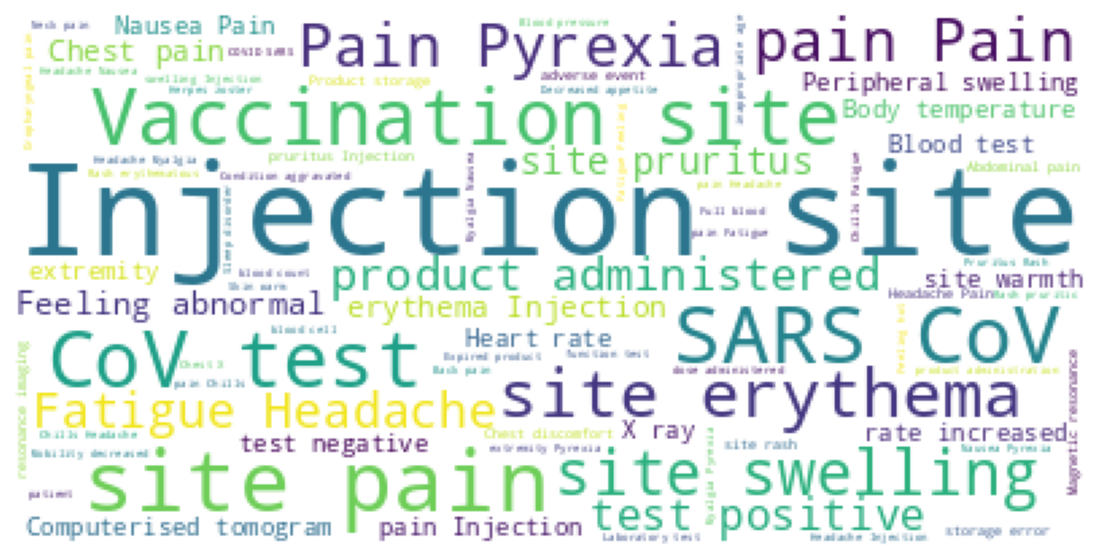

In [9]:
import matplotlib.pyplot as plt
# Get the text from the ALL_SYMPTOMS column
text = ' '.join(df_symptoms_2021['ALL_SYMPTOMS'].tolist())

# Create a word cloud
wordcloud = WordCloud(
    background_color='white',
    max_font_size=50).generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 7))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


In [12]:
# prompt: drop FORM_VERS , SYMPTOMVERSION3,SYMPTOMVERSION4,SYMPTOMVERSION1, SYMPTOMVERSION2 , ignore errors

df_symptoms_2021.drop(columns=['FORM_VERS', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION1', 'SYMPTOMVERSION2','SYMPTOMVERSION5' ], errors='ignore', inplace=True)


In [13]:
print(df_symptoms_2021.describe())

           VAERS_ID
count  1.003896e+06
mean   1.442139e+06
std    3.647273e+05
min    9.106420e+05
25%    1.146282e+06
50%    1.387573e+06
75%    1.696741e+06
max    2.736699e+06


In [14]:
# prompt: df_symptoms_2021 head

print(df_symptoms_2021.head())


   VAERS_ID          SYMPTOM1              SYMPTOM2                  SYMPTOM3  \
0    910642          Dyspnoea  Heart rate increased  SARS-CoV-2 test negative   
1    916600         Dysphagia          Epiglottitis                       NaN   
2    916601           Anxiety              Dyspnoea                       NaN   
3    916602  Chest discomfort             Dysphagia         Pain in extremity   
4    916603         Dizziness               Fatigue        Mobility decreased   

            SYMPTOM4 SYMPTOM5  \
0                NaN      NaN   
1                NaN      NaN   
2                NaN      NaN   
3  Visual impairment      NaN   
4                NaN      NaN   

                                        ALL_SYMPTOMS  
0  Dyspnoea Heart rate increased SARS-CoV-2 test ...  
1                             Dysphagia Epiglottitis  
2                                   Anxiety Dyspnoea  
3  Chest discomfort Visual impairment Dysphagia P...  
4               Dizziness Fatigue Mobil

In [10]:
# prompt: count unique  SYMPTOMS

num_unique_symptoms = df_symptoms_2021['ALL_SYMPTOMS'].nunique()
print(f"Number of unique symptoms: {num_unique_symptoms}")




Number of unique symptoms: 481970


In [15]:
# Explore Datasets
df_symptoms_2021.isnull().sum()

VAERS_ID             0
SYMPTOM1             0
SYMPTOM2        225538
SYMPTOM3        408255
SYMPTOM4        551438
SYMPTOM5        665894
ALL_SYMPTOMS         0
dtype: int64

In [16]:
# prompt: drop VAX_LOT ,  VAX_DOSE_SERIES, VAX_ROUTE , VAX_SITE

df_vaers_vax_2021.drop(columns=['VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE','BIRTH_DEFECT'], errors='ignore',inplace=True)


In [17]:
df_vaers_vax_2021.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_NAME
0,910642,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
1,916600,COVID19,MODERNA,COVID19 (COVID19 (MODERNA))
2,916601,COVID19,MODERNA,COVID19 (COVID19 (MODERNA))
3,916602,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
4,916603,COVID19,MODERNA,COVID19 (COVID19 (MODERNA))


In [18]:
# prompt: drop V_FUNDBY, V_ADMINBY, OTHER_MEDS

df_vaers_data_2021.drop(columns=['V_FUNDBY', 'V_ADMINBY', 'OTHER_MEDS'], inplace=True, errors='ignore')


In [19]:
# prompt: drop PRIOR_VAX, TODAYS_DATE, PRIOR_VAX ,CUR_ILL , LAB_DATA

df_vaers_data_2021.drop(columns=['PRIOR_VAX', 'TODAYS_DATE', 'PRIOR_VAX' ,'CUR_ILL' , 'LAB_DATA'], inplace=True, errors='ignore')


In [20]:
# Explore Datasets
df_vaers_data_2021.isnull().sum()

VAERS_ID             0
RECVDATE             0
STATE           115887
AGE_YRS          81007
CAGE_YR         148654
CAGE_MO         748705
SEX                  0
RPT_DATE        752078
SYMPTOM_TEXT       577
DIED            742456
DATEDIED        743627
L_THREAT        741891
ER_VISIT        752879
HOSPITAL        705537
HOSPDAYS        721807
X_STAY          752628
DISABLE         741033
RECOVD           73431
VAX_DATE         55745
ONSET_DATE       65815
NUMDAYS          94529
HISTORY         378107
SPLTTYPE        533091
FORM_VERS            0
BIRTH_DEFECT    752547
OFC_VISIT       608478
ER_ED_VISIT     662703
ALLERGIES       454461
dtype: int64

In [21]:
df_vaers_data_2021.head(12)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,VAX_DATE,ONSET_DATE,NUMDAYS,HISTORY,SPLTTYPE,FORM_VERS,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,12/28/2020,12/30/2020,2.0,NaN,NaN,2,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,12/31/2020,12/31/2020,0.0,Patient residing at nursing facility. See pati...,NaN,2,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,12/31/2020,12/31/2020,0.0,NaN,NaN,2,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,12/23/2020,12/23/2020,0.0,"diverticulitis, mitral valve prolapse, osteoar...",NaN,2,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,12/22/2020,12/29/2020,7.0,NaN,NaN,2,NaN,NaN,NaN,Na
5,916605,01/01/2021,TX,40.0,40.0,NaN,M,NaN,"Adverse Events: Inflammation in the eye, confu...",NaN,...,09/25/2020,09/26/2020,1.0,NaN,NaN,2,NaN,Y,NaN,NaN
6,916606,01/01/2021,NV,44.0,44.0,NaN,F,NaN,patient called back the next day and stated he...,NaN,...,12/29/2020,12/29/2020,0.0,NaN,NaN,2,NaN,NaN,NaN,iodine (shellfish) has epipen
7,916607,01/01/2021,KS,50.0,50.0,NaN,M,NaN,SEVERE chills approximately 13-14 hours after ...,NaN,...,12/28/2020,12/29/2020,1.0,"High blood pressure, high cholesterol, sleep a...",NaN,2,NaN,NaN,NaN,Penicillin
8,916608,01/01/2021,OH,33.0,33.0,NaN,M,NaN,Nasal congestion and diarrhea,NaN,...,12/29/2020,12/31/2020,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN
9,916609,01/01/2021,TN,71.0,71.0,NaN,F,NaN,On day 9 following the vaccination I noticed a...,NaN,...,12/23/2020,12/31/2020,8.0,"Hashimoto's thyroiditis, Hypertension, depression",NaN,2,NaN,NaN,NaN,"Sulfa antibiotics, azithromycin, adhesive in ..."


In [19]:
# prompt: set all DIED rows that are not equal to Y to N

df_vaers_data_2021['DIED'] = df_vaers_data_2021['DIED'].apply(lambda x: 'N' if x != 'Y' else x)


In [24]:
# prompt: Give me a DIED column count

died_count = df_vaers_data_2021['DIED'].value_counts()
print(died_count)


DIED
N    742456
Y     10550
Name: count, dtype: int64


In [22]:
# Explore Datasets
df_symptoms_2021.isnull().sum()

VAERS_ID             0
SYMPTOM1             0
SYMPTOM2        225538
SYMPTOM3        408255
SYMPTOM4        551438
SYMPTOM5        665894
ALL_SYMPTOMS         0
dtype: int64

In [23]:
# Drop  Columns
clean_vaers_data_df = df_vaers_data_2021.drop(columns =['CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'ONSET_DATE','NUMDAYS', 'LAB_DATA', 'SYMPTOM_TEXT',
                                                   'V_ADMINBY', 'DATEDIED', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'PRIOR_VAX','VAX_DATE',
                                                   'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'OFC_VISIT', 'HISTORY', 'ER_ED_VISIT', 'ALLERGIES',
                                                   'RECVDATE','STATE','HOSPDAYS','X_STAY','RECOVD'],errors='ignore')

In [24]:
clean_vaers_data_df.columns

Index(['VAERS_ID', 'AGE_YRS', 'SEX', 'DIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'DISABLE', 'BIRTH_DEFECT'],
      dtype='object')

**Note:** I will focus in column: SYMPTOM1

In [25]:
df_vaers_vax_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797081 entries, 0 to 797080
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   VAERS_ID  797081 non-null  int64 
 1   VAX_TYPE  797081 non-null  object
 2   VAX_MANU  797081 non-null  object
 3   VAX_NAME  797081 non-null  object
dtypes: int64(1), object(3)
memory usage: 24.3+ MB


In [26]:
df_symptoms_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003896 entries, 0 to 1003895
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   VAERS_ID      1003896 non-null  int64 
 1   SYMPTOM1      1003896 non-null  object
 2   SYMPTOM2      778358 non-null   object
 3   SYMPTOM3      595641 non-null   object
 4   SYMPTOM4      452458 non-null   object
 5   SYMPTOM5      338002 non-null   object
 6   ALL_SYMPTOMS  1003896 non-null  object
dtypes: int64(1), object(6)
memory usage: 53.6+ MB


In [39]:
# prompt: drop SYMPTOMVERSION1. SYMPTOMVERSION2 , SYMPTOMVERSION3, SYMPTOMVERSION4, SYMPTOMVERSION5

df_symptoms_2021.drop(['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'], axis=1, inplace=True,errors='ignore')


In [40]:
# prompt: how many vaers are by vacine manu

df_vaers_vax_2021['VAX_MANU'].value_counts()


VAX_MANU
MODERNA                              349254
PFIZER\BIONTECH                      328949
JANSSEN                               62327
UNKNOWN MANUFACTURER                  16709
GLAXOSMITHKLINE BIOLOGICALS           16291
MERCK & CO. INC.                      10490
SANOFI PASTEUR                         6888
SEQIRUS, INC.                          2155
NOVARTIS VACCINES AND DIAGNOSTICS      1474
PFIZER\WYETH                           1306
PROTEIN SCIENCES CORPORATION            535
DYNAVAX TECHNOLOGIES CORPORATION        247
EMERGENT BIOSOLUTIONS                   137
BERNA BIOTECH, LTD.                      97
MEDIMMUNE VACCINES, INC.                 68
TEVA PHARMACEUTICALS                     43
MASS. PUB HLTH BIOL LAB                  29
PAXVAX                                   25
MSP VACCINE COMPANY                      22
INTERCELL AG                             17
CSL LIMITED                               9
SMITHKLINE BEECHAM                        7
PASTEUR MERIEUX CONNAUG

In [41]:
# prompt: merge all 3 data frame

df_combine_2021 = pd.merge(df_vaers_data_2021, df_vaers_vax_2021, on='VAERS_ID', how='inner')
df_combine_2021 = pd.merge(df_combine_2021, df_symptoms_2021, on='VAERS_ID', how='inner')


In [42]:
df_combine_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070234 entries, 0 to 1070233
Data columns (total 37 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   VAERS_ID      1070234 non-null  int64  
 1   RECVDATE      1070234 non-null  object 
 2   STATE         923390 non-null   object 
 3   AGE_YRS       975545 non-null   float64
 4   CAGE_YR       881058 non-null   float64
 5   CAGE_MO       8245 non-null     float64
 6   SEX           1070234 non-null  object 
 7   RPT_DATE      1293 non-null     object 
 8   SYMPTOM_TEXT  1069604 non-null  object 
 9   DIED          20392 non-null    object 
 10  DATEDIED      18847 non-null    object 
 11  L_THREAT      26261 non-null    object 
 12  ER_VISIT      192 non-null      object 
 13  HOSPITAL      112784 non-null   object 
 14  HOSPDAYS      80015 non-null    float64
 15  X_STAY        771 non-null      object 
 16  DISABLE       27298 non-null    object 
 17  RECOVD        977511 non-nu

In [43]:
df_combine_2021.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,ALL_SYMPTOMS
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,Pcn and bee venom,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN,Dysphagia Epiglottitis
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,"""Dairy""",COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN,Anxiety Dyspnoea
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,Shellfish,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN,Chest discomfort Visual impairment Dysphagia P...
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,"Diclofenac, novacaine, lidocaine, pickles, tom...",COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Dizziness,Fatigue,Mobility decreased,NaN,NaN,Dizziness Fatigue Mobility decreased
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Na,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,Injection site erythema Injection site warmth ...


In [32]:
df_combine_2021.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'HISTORY', 'SPLTTYPE', 'FORM_VERS',
       'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'VAX_TYPE',
       'VAX_MANU', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4',
       'SYMPTOM5', 'ALL_SYMPTOMS'],
      dtype='object')

In [33]:
# prompt: how many people died by sex

died_by_sex = df_combine_2021.groupby('SEX')['DIED'].value_counts()

print(died_by_sex)


SEX  DIED
F    N       704793
     Y         8105
M    N       305622
     Y        11743
U    N        39427
     Y          544
Name: count, dtype: int64


In [44]:
df_combine_2021.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,ALL_SYMPTOMS
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,Pcn and bee venom,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN,Dysphagia Epiglottitis
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,"""Dairy""",COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN,Anxiety Dyspnoea
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,Shellfish,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN,Chest discomfort Visual impairment Dysphagia P...
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,"Diclofenac, novacaine, lidocaine, pickles, tom...",COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Dizziness,Fatigue,Mobility decreased,NaN,NaN,Dizziness Fatigue Mobility decreased
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Na,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,Injection site erythema Injection site warmth ...


In [45]:
# prompt: how many rows and columns are there for each df

print("df_symptoms_2021 has", df_symptoms_2021.shape[0], "rows and", df_symptoms_2021.shape[1], "columns")
print("df_vaers_data_2021 has", df_vaers_data_2021.shape[0], "rows and", df_vaers_data_2021.shape[1], "columns")
print("df_vaers_vax_2021 has", df_vaers_vax_2021.shape[0], "rows and", df_vaers_vax_2021.shape[1], "columns")
print("df_combine_2021 has", df_combine_2021.shape[0], "rows and", df_combine_2021.shape[1], "columns")


df_symptoms_2021 has 1003896 rows and 7 columns
df_vaers_data_2021 has 753006 rows and 28 columns
df_vaers_vax_2021 has 797081 rows and 4 columns
df_combine_2021 has 1070234 rows and 37 columns


In [46]:
df_combine_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070234 entries, 0 to 1070233
Data columns (total 37 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   VAERS_ID      1070234 non-null  int64  
 1   RECVDATE      1070234 non-null  object 
 2   STATE         923390 non-null   object 
 3   AGE_YRS       975545 non-null   float64
 4   CAGE_YR       881058 non-null   float64
 5   CAGE_MO       8245 non-null     float64
 6   SEX           1070234 non-null  object 
 7   RPT_DATE      1293 non-null     object 
 8   SYMPTOM_TEXT  1069604 non-null  object 
 9   DIED          20392 non-null    object 
 10  DATEDIED      18847 non-null    object 
 11  L_THREAT      26261 non-null    object 
 12  ER_VISIT      192 non-null      object 
 13  HOSPITAL      112784 non-null   object 
 14  HOSPDAYS      80015 non-null    float64
 15  X_STAY        771 non-null      object 
 16  DISABLE       27298 non-null    object 
 17  RECOVD        977511 non-nu

In [ ]:
df_combine_2021.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,NaN,Pcn and bee venom,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,NaN,"""Dairy""",COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,Y,Shellfish,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom...",COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Dizziness,Fatigue,Mobility decreased,NaN,NaN
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,NaN,Na,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN


In [34]:
df_combine_2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070234 entries, 0 to 1070233
Data columns (total 37 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   VAERS_ID      1070234 non-null  int64  
 1   RECVDATE      1070234 non-null  object 
 2   STATE         923390 non-null   object 
 3   AGE_YRS       975545 non-null   float64
 4   CAGE_YR       881058 non-null   float64
 5   CAGE_MO       8245 non-null     float64
 6   SEX           1070234 non-null  object 
 7   RPT_DATE      1293 non-null     object 
 8   SYMPTOM_TEXT  1069604 non-null  object 
 9   DIED          20392 non-null    object 
 10  DATEDIED      18847 non-null    object 
 11  L_THREAT      26261 non-null    object 
 12  ER_VISIT      192 non-null      object 
 13  HOSPITAL      112784 non-null   object 
 14  HOSPDAYS      80015 non-null    float64
 15  X_STAY        771 non-null      object 
 16  DISABLE       27298 non-null    object 
 17  RECOVD        977511 non-nu

In [35]:
# prompt: Determine the top 12 most common sysmtoms by vaccine manu

top_12_symptoms = df_combine_2021.groupby('VAX_MANU')['SYMPTOM1'].value_counts().sort_values(ascending=False).head(12)
print(top_12_symptoms)


VAX_MANU         SYMPTOM1               
MODERNA          Chills                     28733
                 Arthralgia                 20233
PFIZER\BIONTECH  Chills                     19162
                 Arthralgia                 17683
                 COVID-19                   17323
                 Dizziness                  16167
MODERNA          Injection site erythema    14783
                 Fatigue                    13872
                 Headache                   12506
PFIZER\BIONTECH  Fatigue                    11969
MODERNA          Dizziness                  11868
PFIZER\BIONTECH  Headache                   10987
Name: count, dtype: int64


In [47]:
# prompt: systoms for people who die value counts

df_combine_2021.groupby('DIED')['SYMPTOM1'].value_counts()


DIED  SYMPTOM1                      
Y     Death                             4508
      COVID-19                          1881
      Acute respiratory failure          460
      Asthenia                           448
      Acute kidney injury                439
                                        ... 
      Mean cell volume                     1
      Bronchiectasis                       1
      Mean platelet volume increased       1
      Bronchial disorder                   1
      Hepatic lesion                       1
Name: count, Length: 1689, dtype: int64

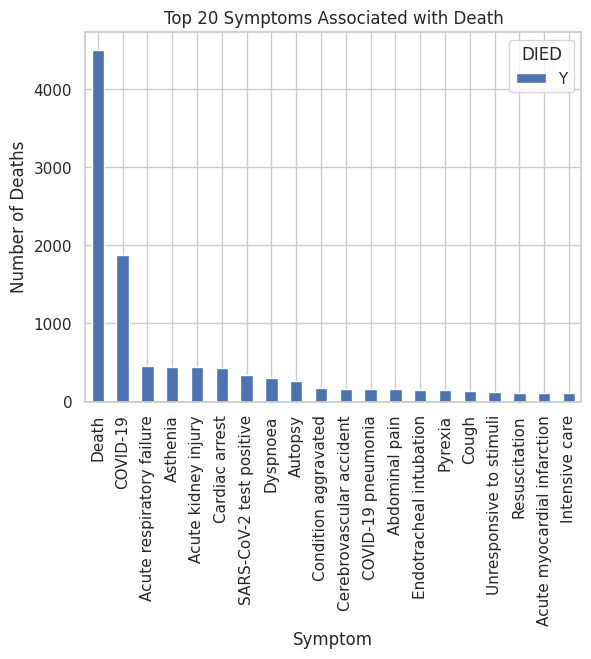

In [48]:
# prompt: plot the most common systom1 who DIED top 20

import matplotlib.pyplot as plt

# Group the data by SYMPTOM1 and DIED
grouped_data = df_combine_2021.groupby(['SYMPTOM1', 'DIED'])['VAERS_ID'].count().unstack()

# Sort the data by the number of deaths
grouped_data = grouped_data.sort_values(by='Y', ascending=False)

# Select the top 20 symptoms
top_20_symptoms = grouped_data.head(20)

# Plot the data as a bar chart
top_20_symptoms.plot(kind='bar', stacked=True)
plt.xlabel('Symptom')
plt.ylabel('Number of Deaths')
plt.title('Top 20 Symptoms Associated with Death')
plt.show()


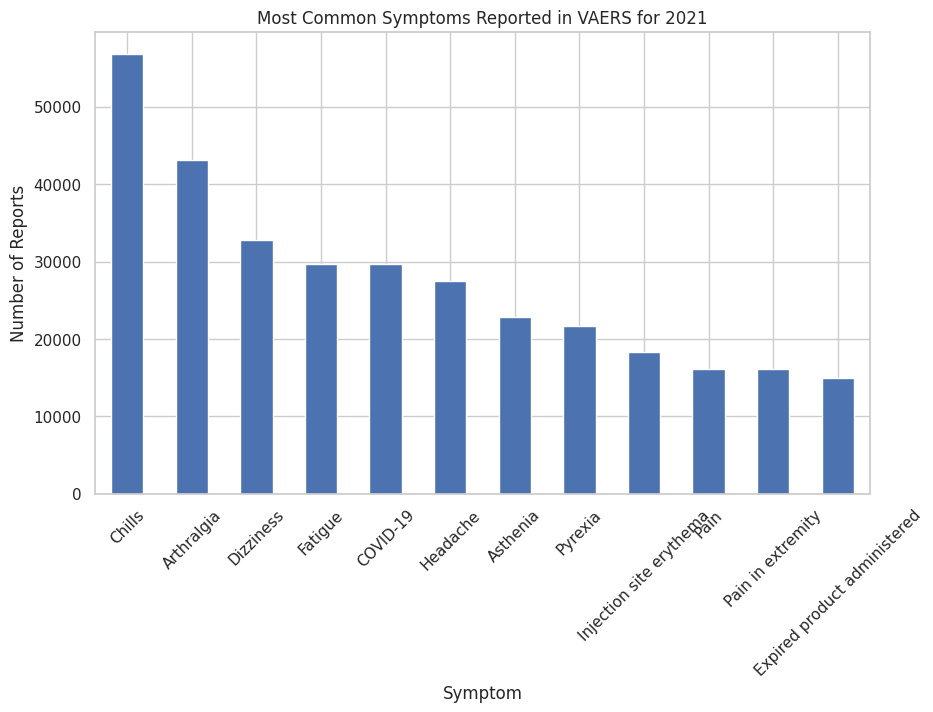

In [49]:
# prompt: plot the most common systom1 and plot it

import matplotlib.pyplot as plt

# Get the top 12 symptoms
top_12_symptoms = df_combine_2021.groupby('SYMPTOM1')['VAERS_ID'].count().sort_values(ascending=False).head(12)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_12_symptoms.plot(kind='bar')

# Add title and labels
plt.title('Most Common Symptoms Reported in VAERS for 2021')
plt.xlabel('Symptom')
plt.ylabel('Number of Reports')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [50]:
# prompt: how many people die by vacine manu

#df_combine_2021.groupby('VAX_MANU')['DIED'].sum()
df_combine_2021.groupby('VAX_MANU')['DIED'].value_counts()


VAX_MANU                           DIED
DYNAVAX TECHNOLOGIES CORPORATION   Y          2
GLAXOSMITHKLINE BIOLOGICALS        Y         78
JANSSEN                            Y       1901
MERCK & CO. INC.                   Y         92
MODERNA                            Y       8160
NOVARTIS VACCINES AND DIAGNOSTICS  Y          3
PAXVAX                             Y          2
PFIZER\BIONTECH                    Y       9646
PFIZER\WYETH                       Y         39
PROTEIN SCIENCES CORPORATION       Y          4
SANOFI PASTEUR                     Y         77
SEQIRUS, INC.                      Y         14
UNKNOWN MANUFACTURER               Y        374
Name: count, dtype: int64

In [46]:
# prompt: set the index as VAERS_ID

df_symptoms = df_combine_2021.set_index('VAERS_ID')


In [47]:
df_symptoms.head(10)

,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,...,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
VAERS_ID,,,,,,,,,,,,,,,,,,,,,
916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,N,NaN,...,NaN,Pcn and bee venom,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN
916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,N,NaN,...,NaN,"""Dairy""",COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN
916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",N,NaN,...,Y,Shellfish,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN
916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",N,NaN,...,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom...",COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Dizziness,Fatigue,Mobility decreased,NaN,NaN
916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",N,NaN,...,NaN,Na,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN
916605,01/01/2021,TX,40.0,40.0,NaN,M,NaN,"Adverse Events: Inflammation in the eye, confu...",N,NaN,...,NaN,NaN,FLUC4,"SEQIRUS, INC.",INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT),Chills,Confusional state,Eye inflammation,Headache,Laboratory test
916605,01/01/2021,TX,40.0,40.0,NaN,M,NaN,"Adverse Events: Inflammation in the eye, confu...",N,NaN,...,NaN,NaN,FLUC4,"SEQIRUS, INC.",INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT),Pyrexia,White blood cell count decreased,NaN,NaN,NaN
916606,01/01/2021,NV,44.0,44.0,NaN,F,NaN,patient called back the next day and stated he...,N,NaN,...,NaN,iodine (shellfish) has epipen,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Pharyngeal swelling,NaN,NaN,NaN,NaN
916607,01/01/2021,KS,50.0,50.0,NaN,M,NaN,SEVERE chills approximately 13-14 hours after ...,N,NaN,...,NaN,Penicillin,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Abdominal pain,Chills,Sleep disorder,NaN,NaN


In [51]:
# prompt: what are the values of DIED

df_combine_2021['DIED'].value_counts()


DIED
Y    20392
Name: count, dtype: int64

In [57]:
# prompt: How many people die by state

df_combine_2021.groupby('STATE')['DIED'].value_counts().sort_values(ascending=False)


STATE  DIED
TX     Y       1436
MI     Y       1378
KY     Y       1361
CA     Y       1084
FL     Y        906
NY     Y        668
TN     Y        620
IL     Y        570
GA     Y        561
MN     Y        535
WI     Y        521
PA     Y        480
OH     Y        478
WA     Y        448
MO     Y        388
NJ     Y        308
MA     Y        264
NC     Y        260
IN     Y        240
VA     Y        227
AZ     Y        212
CO     Y        198
IA     Y        198
MD     Y        188
AR     Y        175
SC     Y        165
PR     Y        161
OR     Y        157
NH     Y        145
KS     Y        137
SD     Y        136
AL     Y        131
NE     Y        130
LA     Y        125
MT     Y        124
NM     Y        109
OK     Y         93
CT     Y         90
MS     Y         87
WV     Y         85
ND     Y         75
ME     Y         69
NV     Y         58
UT     Y         54
HI     Y         51
WY     Y         46
AK     Y         39
ID     Y         36
DE     Y         35
VT     Y

In [58]:
# prompt: combine all columns into one SYMPTOM

df_combine_2021['SYMPTOM'] = df_combine_2021['SYMPTOM1'].fillna('') + ',' + df_combine_2021['SYMPTOM2'].fillna('') + ',' + df_combine_2021['SYMPTOM3'].fillna('')


In [60]:
# prompt: top 12 value counts for sysmtoms

df_combine_2021['SYMPTOM1' ].value_counts().head(12)



SYMPTOM1
Chills                          56844
Arthralgia                      43081
Dizziness                       32838
Fatigue                         29682
COVID-19                        29674
Headache                        27503
Asthenia                        22798
Pyrexia                         21639
Injection site erythema         18272
Pain                            16171
Pain in extremity               16082
Expired product administered    15008
Name: count, dtype: int64

In [55]:
# prompt: append SYMPTOM1, SYMPTOM2

df_combine_2021['SYMPTOM'] = df_combine_2021['SYMPTOM1'].fillna('') + ',' + df_combine_2021['SYMPTOM2'].fillna('')
df_combine_2021.head()


,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,ALL_SYMPTOMS,SYMPTOM
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN,Dysphagia Epiglottitis,"Dysphagia,Epiglottitis"
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN,Anxiety Dyspnoea,"Anxiety,Dyspnoea"
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN,Chest discomfort Visual impairment Dysphagia P...,"Chest discomfort,Dysphagia"
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Dizziness,Fatigue,Mobility decreased,NaN,NaN,Dizziness Fatigue Mobility decreased,"Dizziness,Fatigue"
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,Injection site erythema Injection site warmth ...,"Injection site erythema,Injection site pruritus"


In [61]:
# prompt: WHAT ARE TOP 10 MOST COMMON VALUE IN SYMPTOM1
df_combine_2021['SYMPTOM2'].value_counts().head(12)


SYMPTOM2
Headache                    40192
Fatigue                     37086
Chills                      29014
Pyrexia                     21791
Dizziness                   20991
Pain                        20446
Pain in extremity           16983
Nausea                      15718
SARS-CoV-2 test positive    13644
Injection site pain         13000
Dyspnoea                    12512
Myalgia                     11566
Name: count, dtype: int64

In [62]:
df_combine_2021.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'HISTORY', 'SPLTTYPE', 'FORM_VERS',
       'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'VAX_TYPE',
       'VAX_MANU', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4',
       'SYMPTOM5', 'ALL_SYMPTOMS', 'SYMPTOM'],
      dtype='object')

In [ ]:
df_symptoms.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1070234 entries, 916600 to 2594447
Data columns (total 39 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   RECVDATE      1070234 non-null  object 
 1   STATE         923390 non-null   object 
 2   AGE_YRS       975545 non-null   float64
 3   CAGE_YR       881058 non-null   float64
 4   CAGE_MO       8245 non-null     float64
 5   SEX           1070234 non-null  object 
 6   RPT_DATE      1293 non-null     object 
 7   SYMPTOM_TEXT  1069604 non-null  object 
 8   DIED          20392 non-null    object 
 9   DATEDIED      18847 non-null    object 
 10  L_THREAT      26261 non-null    object 
 11  ER_VISIT      192 non-null      object 
 12  HOSPITAL      112784 non-null   object 
 13  HOSPDAYS      80015 non-null    float64
 14  X_STAY        771 non-null      object 
 15  DISABLE       27298 non-null    object 
 16  RECOVD        977511 non-null   object 
 17  VAX_DATE      1003370 non-n

In [63]:
# prompt: count  VAX_TYPE and print by value type

df_combine_2021['VAX_TYPE'].value_counts()


VAX_TYPE
COVID19    1003682
VARZOS       16956
UNK          12246
FLU4          6789
HPV9          2161
            ...   
MU               1
MNQHIB           1
PNC10            1
DTPHEP           1
H5N1             1
Name: count, Length: 70, dtype: int64

In [64]:
# prompt: keep all row where VAX_TYPE is COVID19

df_combine_2021 = df_combine_2021[df_combine_2021['VAX_TYPE'] == 'COVID19']


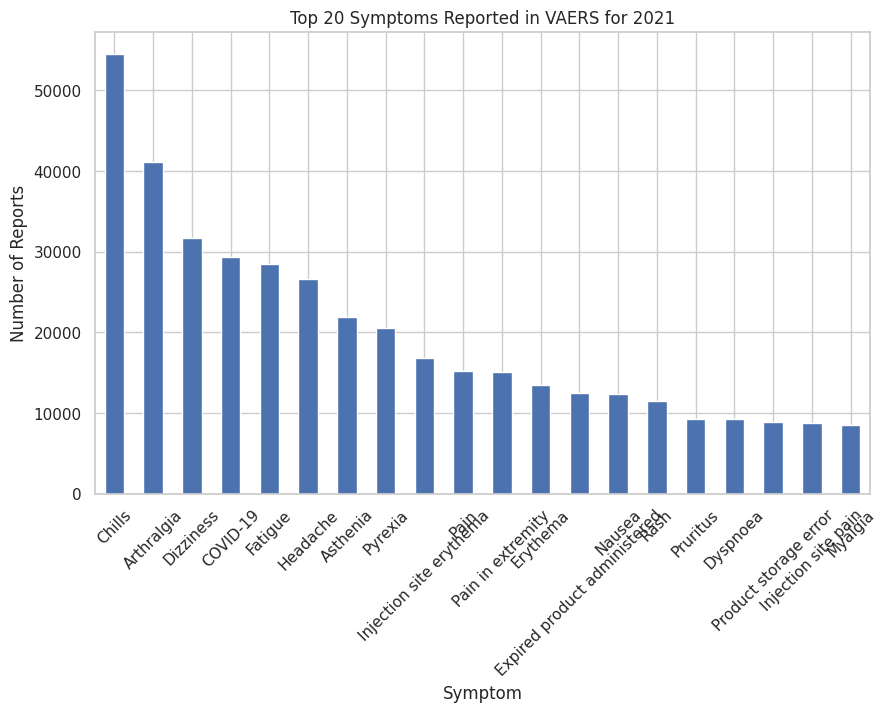

In [65]:
# prompt: plot symtoms1 top 20

import pandas as pd
import matplotlib.pyplot as plt

# Get the top 20 symptoms
top_20_symptoms = df_combine_2021['SYMPTOM1'].value_counts().head(20)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_20_symptoms.plot(kind='bar')

# Add title and labels
plt.title('Top 20 Symptoms Reported in VAERS for 2021')
plt.xlabel('Symptom')
plt.ylabel('Number of Reports')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [66]:
# prompt: how many people DIED by sex

died_by_sex = df_combine_2021.groupby('SEX')['DIED'].value_counts()
print(died_by_sex)


SEX  DIED
F    Y        7907
M    Y       11347
U    Y         512
Name: count, dtype: int64


In [67]:
# prompt: count SYMPTOM1

countSymtoms1=df_combine_2021['SYMPTOM1'].value_counts().head(20)
print(countSymtoms1)


SYMPTOM1
Chills                          54545
Arthralgia                      41171
Dizziness                       31682
COVID-19                        29368
Fatigue                         28507
Headache                        26586
Asthenia                        21859
Pyrexia                         20612
Injection site erythema         16827
Pain                            15249
Pain in extremity               15086
Erythema                        13460
Expired product administered    12508
Nausea                          12334
Rash                            11443
Pruritus                         9229
Dyspnoea                         9224
Product storage error            8949
Injection site pain              8747
Myalgia                          8537
Name: count, dtype: int64


In [68]:
# prompt: what us the most common symtom vaccine manu

most_common_symptom = df_combine_2021['SYMPTOM1'].mode()[0]
print(f"The most common symptom is: {most_common_symptom}")


The most common symptom is: Chills


In [69]:
# prompt: count symtom by state for top 5 state with symtoms

top_5_states = df_combine_2021['STATE'].value_counts().head(5).index.tolist()

symptom_counts_by_state = {}

for state in top_5_states:
  state_symptoms = df_combine_2021[df_combine_2021['STATE'] == state]['SYMPTOM1'].value_counts()
  symptom_counts_by_state[state] = state_symptoms

for state, symptoms in symptom_counts_by_state.items():
  print(f"Top symptoms in {state}:")
  print(symptoms.head())
  print()


Top symptoms in CA:
SYMPTOM1
Chills        4218
Dizziness     3951
Arthralgia    3286
Fatigue       2290
Headache      2195
Name: count, dtype: int64

Top symptoms in FL:
SYMPTOM1
Chills        2787
Arthralgia    2478
Dizziness     1836
Asthenia      1538
Fatigue       1504
Name: count, dtype: int64

Top symptoms in TX:
SYMPTOM1
Chills        2597
Arthralgia    2074
Dizziness     1764
Fatigue       1401
Headache      1401
Name: count, dtype: int64

Top symptoms in NY:
SYMPTOM1
Chills        2701
Arthralgia    1978
Dizziness     1623
Fatigue       1474
Headache      1273
Name: count, dtype: int64

Top symptoms in MI:
SYMPTOM1
COVID-19      2245
Chills        1451
Arthralgia    1108
Asthenia       938
Dizziness      832
Name: count, dtype: int64



In [70]:
# prompt: number of VAERS by state

df_combine_2021['STATE'].value_counts()


STATE
CA    93263
FL    56534
TX    54112
NY    52162
MI    36219
      ...  
XL        6
XV        4
Tx        3
QM        2
Ca        1
Name: count, Length: 64, dtype: int64

In [71]:
# prompt: how many null values are the dataset df_vaers_vax_2021

df_combine_2021.isnull().sum()

DROP Linear Regression


VAERS_ID              0
RECVDATE              0
STATE            135099
AGE_YRS           77196
CAGE_YR          168618
CAGE_MO         1001956
SEX                   0
RPT_DATE        1002719
SYMPTOM_TEXT        550
DIED             983916
DATEDIED         985329
L_THREAT         978621
ER_VISIT        1003548
HOSPITAL         895134
HOSPDAYS         926398
X_STAY          1003008
DISABLE          978527
RECOVD            88214
VAX_DATE          54173
ONSET_DATE        62620
NUMDAYS          100864
HISTORY          449377
SPLTTYPE         741753
FORM_VERS             0
BIRTH_DEFECT    1002859
OFC_VISIT        771890
ER_ED_VISIT      837252
ALLERGIES        556563
VAX_TYPE              0
VAX_MANU              0
VAX_NAME              0
SYMPTOM1              0
SYMPTOM2         218471
SYMPTOM3         397143
SYMPTOM4         539451
SYMPTOM5         654141
ALL_SYMPTOMS          0
SYMPTOM               0
dtype: int64

Number of VAERS by state

In [79]:
# prompt: prompt: convert columns ONSET_DATE, VAX_DATE into datetime include ignore error in df_combine_2021

import pandas as pd
df_combine_2021['ONSET_DATE'] = pd.to_datetime(df_combine_2021['ONSET_DATE'], errors='ignore')
df_combine_2021['VAX_DATE'] = pd.to_datetime(df_combine_2021['VAX_DATE'], errors='ignore')


In [91]:
# prompt: drop the following columns SYMPTOM_TEXT, CAGE_MO, RPT_DATE,RECVDATE,, DISABLE,CUR_ILL, PRIOR_VAX, BIRTH_DEFECT, SYMPTOM_TEXT, CAGE_MO, RPT_DATE,RECVDATE,, DISABLE,CUR_ILL, PRIOR_VAX, BIRTH_DEFECT

df_combine_2021.drop(columns=['SYMPTOM_TEXT', 'CAGE_MO', 'RPT_DATE','RECVDATE','DISABLE','CUR_ILL', 'PRIOR_VAX', 'BIRTH_DEFECT','SYMPTOM2', 'SYMPTOM3','SYMPTOM4','SYMPTOM5','ALLERGIES'], axis=1, inplace=True, errors='ignore')


In [92]:
df_combine_2021. columns

Index(['level_0', 'index', 'VAERS_ID', 'STATE', 'AGE_YRS', 'CAGE_YR', 'SEX',
       'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS',
       'X_STAY', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'HISTORY',
       'SPLTTYPE', 'FORM_VERS', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES',
       'VAX_TYPE', 'VAX_MANU', 'VAX_NAME', 'SYMPTOM1', 'ALL_SYMPTOMS',
       'SYMPTOM'],
      dtype='object')

In [83]:
# prompt: Can factors like age, gender, vaccine brand, and medical conditions help predict how strongly someone might react to the vaccine?

import pandas as pd

# Read the data into a DataFrame

df=df_combine_2021.copy()

# Select the relevant columns
df = df[['AGE_YRS', 'SEX', 'VAX_MANU', 'DIED']]

# Group the data by age, sex, vaccine brand, and death
grouped_data = df.groupby(['AGE_YRS', 'SEX', 'VAX_MANU', 'DIED']).size().unstack()

# Calculate the percentage of people who died for each group
grouped_data = grouped_data.apply(lambda x: x / x.sum() * 100, axis=1)

# Print the results
print(grouped_data)


DIED                             Y
AGE_YRS SEX VAX_MANU              
0.42    M   PFIZER\BIONTECH  100.0
1.00    M   MODERNA          100.0
1.08    F   PFIZER\BIONTECH  100.0
5.00    F   PFIZER\BIONTECH  100.0
7.00    F   PFIZER\BIONTECH  100.0
...                            ...
103.00  M   PFIZER\BIONTECH  100.0
104.00  F   MODERNA          100.0
            PFIZER\BIONTECH  100.0
105.00  F   PFIZER\BIONTECH  100.0
106.00  F   MODERNA          100.0

[571 rows x 1 columns]


In [85]:
df_combine_2021.columns

Index(['level_0', 'index', 'VAERS_ID', 'STATE', 'AGE_YRS', 'CAGE_YR', 'SEX',
       'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS',
       'X_STAY', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'HISTORY',
       'SPLTTYPE', 'FORM_VERS', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES',
       'VAX_TYPE', 'VAX_MANU', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3',
       'SYMPTOM4', 'SYMPTOM5', 'ALL_SYMPTOMS', 'SYMPTOM'],
      dtype='object')

In [84]:
# prompt: Can factors like age, gender, vaccine brand, and medical conditions help predict how strongly someone might react to the vaccine?

import pandas as pd

# Select the relevant columns
df = df[['AGE_YRS', 'SEX', 'VAX_MANU', 'DIED']]

# Group the data by age, sex, vaccine brand, and death
grouped_data = df.groupby(['AGE_YRS', 'SEX', 'VAX_MANU', 'DIED']).size().unstack()

# Calculate the percentage of people who died for each group
grouped_data = grouped_data.apply(lambda x: x / x.sum() * 100, axis=1)

# Print the results
print(grouped_data)

# You can use this data to analyze the relationship between age, sex, vaccine brand, and the likelihood of death after vaccination. For example, you could use this data to identify groups of people who are at higher risk of experiencing severe side effects from the vaccine.


DIED                             Y
AGE_YRS SEX VAX_MANU              
0.42    M   PFIZER\BIONTECH  100.0
1.00    M   MODERNA          100.0
1.08    F   PFIZER\BIONTECH  100.0
5.00    F   PFIZER\BIONTECH  100.0
7.00    F   PFIZER\BIONTECH  100.0
...                            ...
103.00  M   PFIZER\BIONTECH  100.0
104.00  F   MODERNA          100.0
            PFIZER\BIONTECH  100.0
105.00  F   PFIZER\BIONTECH  100.0
106.00  F   MODERNA          100.0

[571 rows x 1 columns]


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [80]:
# prompt: create a Linear Regression model to predict dead

import numpy as np
from sklearn.linear_model import LinearRegression

# Load the data
X = df_combine_2021[['AGE_YRS', 'SEX', 'VAX_MANU']]
y = df_combine_2021['DIED']

# Create the model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict the dead
y_pred = model.predict(X)

# Evaluate the model
print(f"R^2: {model.score(X, y)}")


ValueError: could not convert string to float: 'F'